In [ ]:
!pip install --upgrade tensorflow--gpu==2.0

Requirement already up-to-date: tensorflow--gpu==2.0 in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [ ]:
!pip install plotly

In [ ]:
!pip install --upgrade nbformat

Requirement already up-to-date: nbformat in /usr/local/lib/python3.6/dist-packages (5.0.8)


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Input,LSTM,Bidirectional
from tensorflow.keras.models import Model







#upload data

In [ ]:
true_data=pd.read_csv("/content/drive/My Drive/True.csv")
false_data=pd.read_csv("/content/drive/My Drive/Fake.csv")

In [ ]:
true_data.head()

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]

In [ ]:
false_data.head()

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

#perform exploratory data analysis

In [ ]:
#add a target class column to indicate whether the news is real or fake
true_data['isfake']=1
true_data.head()

title  ... isfake
0  As U.S. budget fight looms, Republicans flip t...  ...      1
1  U.S. military to accept transgender recruits o...  ...      1
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...      1
3  FBI Russia probe helped by Australian diplomat...  ...      1
4  Trump wants Postal Service to charge 'much mor...  ...      1

[5 rows x 5 columns]

In [ ]:
false_data['isfake']=0
false_data.head()

title  ... isfake
0   Donald Trump Sends Out Embarrassing New Year’...  ...      0
1   Drunk Bragging Trump Staffer Started Russian ...  ...      0
2   Sheriff David Clarke Becomes An Internet Joke...  ...      0
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...      0
4   Pope Francis Just Called Out Donald Trump Dur...  ...      0

[5 rows x 5 columns]

In [ ]:
df=pd.concat([true_data,false_data]).reset_index(drop=True)

In [ ]:
df.head()

title  ... isfake
0  As U.S. budget fight looms, Republicans flip t...  ...      1
1  U.S. military to accept transgender recruits o...  ...      1
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...      1
3  FBI Russia probe helped by Australian diplomat...  ...      1
4  Trump wants Postal Service to charge 'much mor...  ...      1

[5 rows x 5 columns]

In [ ]:
df.drop(columns=['date'],inplace=True)

#perform data cleaning

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
df['original']=df['title']+' '+df['text']
df.head()

title  ...                                           original
0  As U.S. budget fight looms, Republicans flip t...  ...  As U.S. budget fight looms, Republicans flip t...
1  U.S. military to accept transgender recruits o...  ...  U.S. military to accept transgender recruits o...
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  Senior U.S. Republican senator: 'Let Mr. Muell...
3  FBI Russia probe helped by Australian diplomat...  ...  FBI Russia probe helped by Australian diplomat...
4  Trump wants Postal Service to charge 'much mor...  ...  Trump wants Postal Service to charge 'much mor...

[5 rows x 5 columns]

In [ ]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
stop_words=stopwords.words('english')


In [ ]:
def preprocess (text):
  result=[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3 and token not in stop_words:
      
          result.append(token)
  return result

In [ ]:
df['clean']=df['original'].apply(preprocess)

In [ ]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [ ]:
df.head()

title  ...                                              clean
0  As U.S. budget fight looms, Republicans flip t...  ...  [budget, fight, looms, republicans, flip, fisc...
1  U.S. military to accept transgender recruits o...  ...  [military, accept, transgender, recruits, mond...
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  [senior, republican, senator, mueller, washing...
3  FBI Russia probe helped by Australian diplomat...  ...  [russia, probe, helped, australian, diplomat, ...
4  Trump wants Postal Service to charge 'much mor...  ...  [trump, wants, postal, service, charge, amazon...

[5 rows x 6 columns]

In [ ]:
listOfWords=[]
for i in df.clean:
  
    listOfWords.append(i)

In [ ]:
listOfWords

[['budget',
  'fight',
  'looms',
  'republicans',
  'flip',
  'fiscal',
  'script',
  'washington',
  'reuters',
  'head',
  'conservative',
  'republican',
  'faction',
  'congress',
  'voted',
  'month',
  'huge',
  'expansion',
  'national',
  'debt',
  'cuts',
  'called',
  'fiscal',
  'conservative',
  'sunday',
  'urged',
  'budget',
  'restraint',
  'keeping',
  'sharp',
  'pivot',
  'republicans',
  'representative',
  'mark',
  'meadows',
  'speaking',
  'face',
  'nation',
  'drew',
  'hard',
  'line',
  'federal',
  'spending',
  'lawmakers',
  'bracing',
  'battle',
  'january',
  'return',
  'holidays',
  'wednesday',
  'lawmakers',
  'begin',
  'trying',
  'pass',
  'federal',
  'budget',
  'fight',
  'likely',
  'linked',
  'issues',
  'immigration',
  'policy',
  'november',
  'congressional',
  'election',
  'campaigns',
  'approach',
  'republicans',
  'seek',
  'control',
  'congress',
  'president',
  'donald',
  'trump',
  'republicans',
  'want',
  'budget',
  'i

In [ ]:
len(listOfWords)

44898

In [ ]:
total_words=len(list (listOfWords))
total_words

44898

In [ ]:
df['clean_joined']=df['clean'].apply(lambda x:" ".join(x) )

In [ ]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [ ]:
df

title  ...                                       clean_joined
0      As U.S. budget fight looms, Republicans flip t...  ...  budget fight looms republicans flip fiscal scr...
1      U.S. military to accept transgender recruits o...  ...  military accept transgender recruits monday pe...
2      Senior U.S. Republican senator: 'Let Mr. Muell...  ...  senior republican senator mueller washington r...
3      FBI Russia probe helped by Australian diplomat...  ...  russia probe helped australian diplomat washin...
4      Trump wants Postal Service to charge 'much mor...  ...  trump wants postal service charge amazon shipm...
...                                                  ...  ...                                                ...
44893  McPain: John McCain Furious That Iran Treated ...  ...  mcpain john mccain furious iran treated sailor...
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...  justice yahoo settles mail privacy class actio...
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...  sunnistan allied safe zone plan territorial bo...
44896  How to Blow $700 Million: Al Jazeera America F...  ...  blow million jazeera america finally calls qui...
44897  10 U.S. Navy Sailors Held by Iranian Military ...  ...  navy sailors held iranian military signs neoco...

[44898 rows x 7 columns]

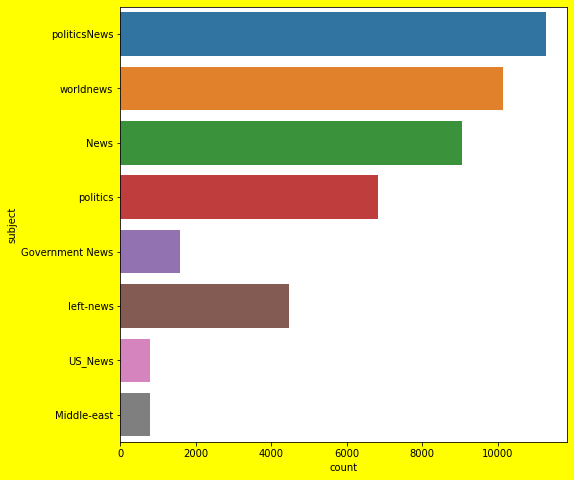

In [ ]:
#plot number of samples in subject
plt.figure(figsize=(8,8),facecolor='yellow',edgecolor='black')
sns.countplot(y='subject',data=df)

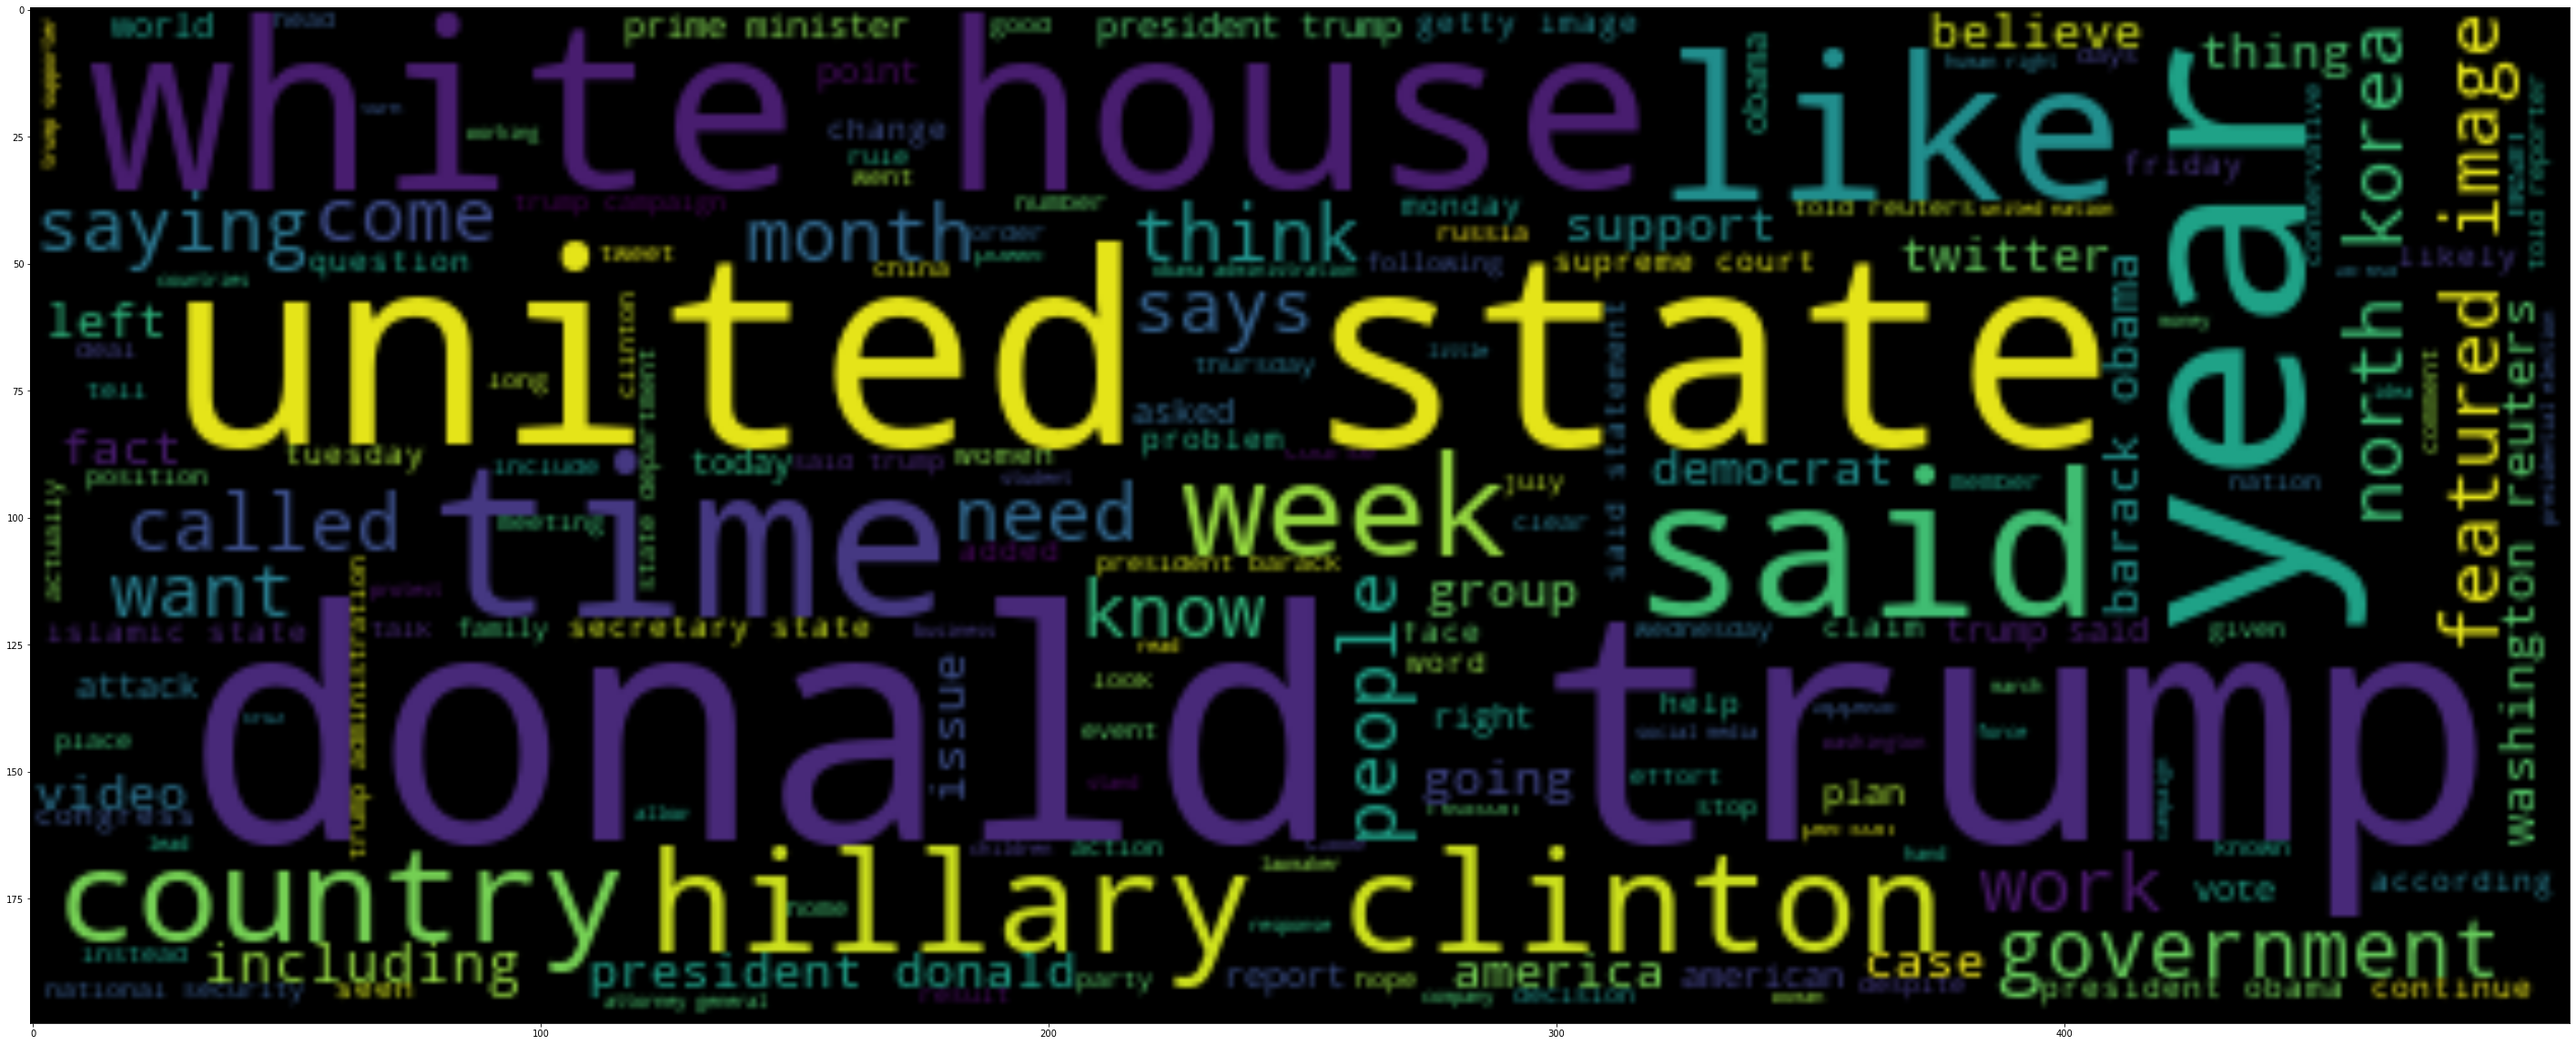

In [ ]:
plt.figure(figsize=(50,50))
wc=WordCloud(max_words=2000,width=500,stopwords=stop_words).generate(" ".join(df['clean_joined'])+" ")
plt.imshow(wc,interpolation='bilinear')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
maxlen=-1
for doc in df.clean_joined:
  tokens= nltk.word_tokenize(doc)
  if(maxlen<len(tokens)):
    maxlen= len(tokens)
print("the maximum number of words in any document is:",maxlen)

the maximum number of words in any document is: 4406


In [ ]:
import plotly.express as px
fig=px.histogram(x=[len(nltk.word_tokenize(x)) for x in df.clean_joined],nbins=100)
fig.show()

#perform tokenization and padding

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.clean_joined,df.isfake,test_size=0.2)

In [ ]:
from nltk import word_tokenize

In [ ]:
tokenizer =Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
text_sequences=tokenizer.texts_to_sequences(X_test)

In [ ]:
print('the encoding for document\n',df.clean_joined[0],'\n is :', train_sequence[0])

the encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [ ]:
padded_train=pad_sequences(train_sequence,maxlen=40,padding='post',truncating='post')
padded_test=pad_sequences(text_sequences,maxlen=40,truncating='post')

In [ ]:
for i,doc in enumerate(padded_train[12]):
  print("The padded ecoding for document",i+1,"is : ",doc)

The padded ecoding for document 1 is :  15977
The padded ecoding for document 2 is :  1
The padded ecoding for document 3 is :  1636
The padded ecoding for document 4 is :  1875
The padded ecoding for document 5 is :  1
The padded ecoding for document 6 is :  484
The padded ecoding for document 7 is :  27269
The padded ecoding for document 8 is :  11331
The padded ecoding for document 9 is :  3
The padded ecoding for document 10 is :  10
The padded ecoding for document 11 is :  1
The padded ecoding for document 12 is :  3485
The padded ecoding for document 13 is :  425
The padded ecoding for document 14 is :  1358
The padded ecoding for document 15 is :  1487
The padded ecoding for document 16 is :  183
The padded ecoding for document 17 is :  906
The padded ecoding for document 18 is :  291
The padded ecoding for document 19 is :  935
The padded ecoding for document 20 is :  738
The padded ecoding for document 21 is :  954
The padded ecoding for document 22 is :  27270
The padded ecod

#build and train the model

In [ ]:
model = Sequential()


In [ ]:
model.add(Embedding(total_words,output_dim=128))

In [ ]:
model.add(Bidirectional(LSTM(128)))

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         5746944   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,043,137
Trainable params: 6,043,137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train=np.asarray(y_train)

In [ ]:
model.fit(padded_train,y_train,batch_size=64, validation_split=0.1,epochs=2 ) 

Train on 32326 samples, validate on 3592 samples
Epoch 1/2
32326/32326 [==============================] - 45s 1ms/sample - loss: 0.0420 - acc: 0.9810 - val_loss: 0.0040 - val_acc: 0.9989
Epoch 2/2
32326/32326 [==============================] - 35s 1ms/sample - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0046 - val_acc: 0.9989


#evaluation

In [ ]:
pred=model.predict(padded_test)

In [ ]:
prediction=[]
for i in range (len(pred)):
  if pred[i].item()>0.5:
    prediction.append(1)
  else:
    prediction.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(list(y_test),prediction)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.9951002227171493


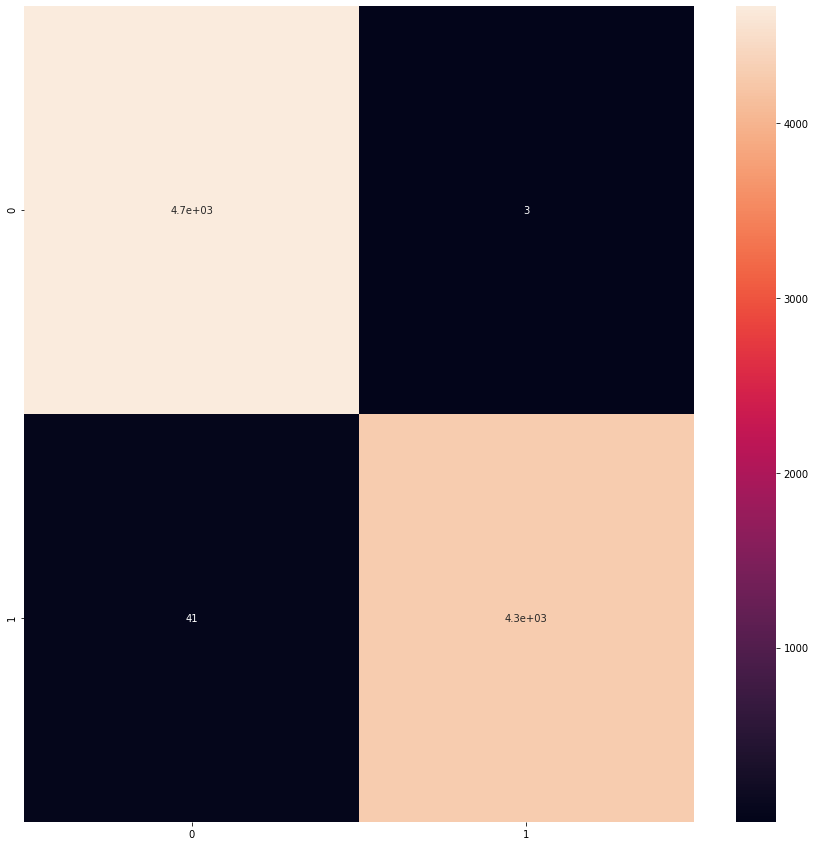

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(list(y_test),prediction)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True)